# Práctica 3
## Objetivos
1. Calcular la solución numérica de una EDO y representarla. 
2. Representar el campo de direcciones del sistema. Dibujar una o varias soluciones sobre dicho campo de direcciones.
3. Encontrar los puntos críticos y las soluciones de equilibrio y reprersentarlos.

## Tabla de comandos

|**NOMBRE**|**DESCRIPCIÓN**|
|:---:|:---:|
|[odeint](https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html)|Procedimiento de resolución numérica de EDOs del módulo integrate|
|[linspace(a, b, N)](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html)|Devuelve una lista de N puntos entre dos valores a y b|
|[meshgrid(PtoX, PtoY)](https://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html)|Define una malla de puntos a partir de una lista de puntos en X y en Y|Función |
|[quiver(X, Y, U, V, scale)](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.quiver.html)|Imprime los vectores velocidades definidas en la malla X, Y con valor vectorial U, V con la escala dada|
|[plot(X, Y, tipo)](https://matplotlib.org/3.1.1/tutorials/introductory/pyplot.html)|Dibuja una linea de puntos definida por unos valores X e Y y un tipo de linea|

Cargamos los módulos necesarios: cálculo simbólico, numérico de manejo de matrices, integración de ecuaciones, gráficos. Ademas instruimos a Jupyter para que devuelva expresiones matemáticas en formato más legible con `sp.init_printing()` 

In [1]:
import sympy as sp
import numpy as np
import scipy.integrate as scint
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
sp.init_printing()

## 1. Crecimiento Poblacional

La estadística de número de **linces** en la **Península Ibérica** en los últimos años ha sido:

|**Año**|**Número**|
|:---:|:---:|
|2015|403|
|2016|483|
|2017|589|
|2018|650|



### Se va a mostrar el <b>campo de direcciones</b> en el plano dibujando los vectores de las tangentes en una malla de puntos.<br> 
<b> <u> Campo de Direcciones </u> </b>
<ul>
    <li> <b>Malla de Puntos</b>: Se determina una malla de puntos utilizando la función <b>meshgrid</b>.</li>
    <ul> <li><b>Parámetros de entrada</b>: la lista de $n$ <b>Tiempos</b> en el eje OX y la lista de $m$ <b>Poblaciones</b> en el eje OY</li> </ul>
    <ul> <li><b>Retorna</b>: Una matriz $n\cdot m$ de los valores de tiempo de la posición de la malla sobre <b>T</b> y otra matriz $n\cdot m$ con el valor de la población sobre <b>Y</b></li> </ul>
</ul>
<ul>
    <li> <b>Vectores Dirección</b>: A partir de los puntos de la malla guardados en <b>T</b> e <b>Y</b> se determina en cada punto el vector dirección $(1,y')$:</li>
    <ul> <li><b>Coordenada U</b>: matriz $n\cdot m$ de unos</li> </ul>
    <ul> <li><b>Coordenada V</b>: matriz $n\cdot m$ con la pendiente $y'$ que da la función diferencial <b>F</b></li></ul>   
    <ul> <li><b>Normalización del vector (U,V)</b>: Opcionalmente se puede hacer unitario el vector (U,V)</li></ul> 

</ul>
<ul>
    <li> <b>Representación del campo de vectores</b>: La función <b>quiver</b> permite representar el campo de vectores <b>(U,V)</b> cuya posición viene dada por la malla <b>(T,Y)</b> se adopta el parámetro <b>angles="xy"</b></li>
</ul>
<ul>
    <li> <b>Soluciones Particulares</b>: Finalmente se representan las soluciones particulares que en el tiempo $t=0$ parten de cada uno de los valores iniciales $y_0$ o parten de un ($t_0$, $y_0$). En el primer caso de dará una lista de valores $y$, y en el segundo caso una lista de doble dimensión con los posibles valores ($x$,$y$)</li>

In [2]:
def Euler(f, x, y_0):
    y = [0 for i in x]
    y[0]=y_0
    for i in range(len(x)-1):
        y[i+1] = y[i] + f(x[i], y[i])*(x[i+1]-x[i])
    return y
def CampoVectores(f, x_ini, x_has, y_ini, y_has, xy_0, k_0=1.0, _xlabel="", _ylabel="", _title=""):
    
    assert x_ini < x_has, "Error! x_ini debe ser menor que x_has"
    assert y_ini < y_has, "Error! y_ini debe ser menor que y_has"
    
    # Malla rectangular de puntos.
    X, Y = np.meshgrid(np.linspace(x_ini, x_has, 10),  np.linspace(y_ini, y_has, 10))
    
    # Componentes del vector de dirección (1, Y')
    # La primera componente es 1. Construimos una matriz de unos compatible con las dimensiones de X e Y
    U = np.ones([10, 10])
    # La segunda componente de la dirección se obtiene con la función y'=f(x,y)
    V = f(X,Y)
    # Se normaliza la dirección (se hace que su módulo sea unitario)
    Un = U /(U**2+V**2)**0.5
    Vn = V /(U**2+V**2)**0.5
    U = Un
    V = Vn
    
    # Tamaño relativo del gráfico
    plt.figure(figsize = (9,9))

    # El campo de direcciones en el plano es la representación de una función vectorial.
    # Es una función de  dos variables con valores vectoriales de dos componentes.
    plt.quiver(X, Y, U, V, angles="xy")
    for xy0 in xy_0:
        # Lista de valores para solución particular (a partir de x=0)
        if type(xy0)==list:
            x0=xy0[0]
            y0=xy0[1]
        else:
            x0=0
            y0=xy0
        X0 = np.linspace(x0, x_has*k_0, 100)
        Ps = Euler(f, X0, y0)
        plt.plot(X0, Ps, "-")

    # Mostramos la figura
    if (_xlabel!=""): plt.xlabel(_xlabel)
    if (_ylabel!=""): plt.ylabel(_ylabel)
    if (_title!=""): plt.title(_title)
    plt.show()

## 1.1 Calcular el valor de k 

Considerando una población inicial de 403 individuos y que en el año 4 se llegan a los 650:

$$403e^{4k}=650$$

Utilizar la función __np.log()__ para calcular el logaritmo neperiano. El resultado se guarda en la variable __k__

## 1.2 Definir la Ecuación Diferencial del Crecimiento Poblacional

Si se considera que su **crecimiento poblacional**  es **proporcional a la población**. Viene dado por la ecuación diferencial:

$$
\frac{dy}{dt} = ky
$$



In [3]:
# La función 'F' del sistema y el vector 'P' que se compone de las funciones desconocidas 'x(t)', 'y(t)'
def F(t, y):
    return 


## 1.3 Representar el <b>campo de direcciones</b>


__Suponiendo que partimos en una población inicial de 650 mil linces hacer una representación de gráfica de la evolución población en un horizonte temporal de 20 años. El intervalo en la población entre 1 y 10.000.__

__Simule también poblaciones iniciales de 300, 400, 500, 800, 900 y 1000 individuos__

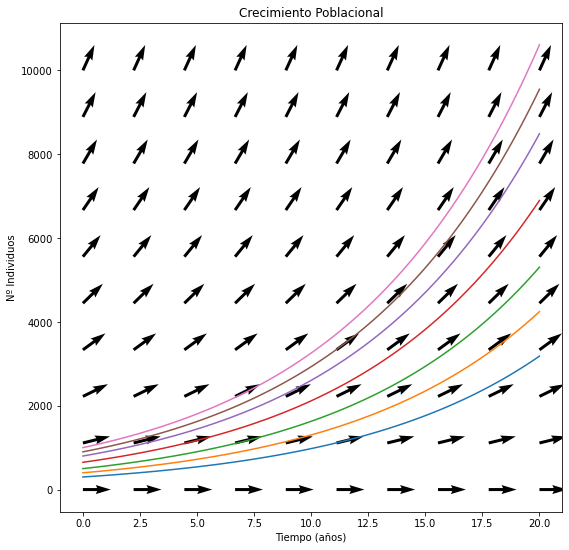

### 1.1 Calcular simbólicamente la solución general
**Solución General que requiere:**
<ul>
    <li> <b>Variable indepediente</b>: Se define $t$ utilizando <b>symbols</b> de sympy.</li>
    <li> <b>Variable depediente</b>: Se define $y$ utilizando <b>Function</b> de sympy.</li>    
    <li> <b>Ecuación diferencial</b>: En <b>edo</b> se guarda la ecuación $\frac{dy}{dt} - k\cdot y$ </li>
    <li> <b>Obtención de la Ecuación General</b>: Con <b>dsolve</b> de sympy se obtiene la ecuación general </li>
</ul>